In [ ]:
#!python -m pip install dask[dataframe]
#!pip install lightautoml

     |████████████████████████████████| 294 kB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 35.6 MB/s 
     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 308 kB 53.2 MB/s 
     |████████████████████████████████| 424 kB 49.2 MB/s 
     |████████████████████████████████| 204 kB 51.5 MB/s 
     |████████████████████████████████| 2.8 MB 27.6 MB/s 
     |████████████████████████████████| 209 kB 60.0 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 112 kB 51.7 MB/s 
     |████████████████████████████████| 149 kB 64.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 78.9 MB/s 
     |████████████

In [57]:
import pandas as pd
from io import StringIO, BytesIO, TextIOWrapper
import requests
from zipfile import ZipFile
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import date
from dask import dataframe as ddf
from dask import array as da
import numpy as np
import pickle
from lightautoml.tasks import Task
from sklearn.metrics import accuracy_score, f1_score, auc
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold

In [ ]:
os_cpu = os.cpu_count()

In [ ]:
url = 'https://drive.google.com/file/d/1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train = pd.read_csv(dwn_url)
train

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0
...,...,...,...,...,...
831648,831648,3812226,2.0,1546203600,0.0
831649,831649,2480469,2.0,1546203600,0.0
831650,831650,158236,2.0,1546203600,0.0
831651,831651,1825525,2.0,1546203600,0.0


In [ ]:
url = 'https://drive.google.com/file/d/1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
test = pd.read_csv(dwn_url)
test

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400
...,...,...,...,...
71226,71226,2502453,5.0,1548018000
71227,71227,1693213,2.0,1548018000
71228,71228,1891350,2.0,1548018000
71229,71229,2437172,2.0,1548018000


In [ ]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)
test.drop(['Unnamed: 0'], axis=1, inplace=True)
train['buy_time'] = train['buy_time'].apply(lambda data: date.fromtimestamp(data))
test['buy_time'] = test['buy_time'].apply(lambda data: date.fromtimestamp(data))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  object 
 3   target    831653 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        71231 non-null  int64  
 1   vas_id    71231 non-null  float64
 2   buy_time  71231 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
!gdown --id  1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9

Downloading...
From: https://drive.google.com/uc?id=1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9
To: /content/features.csv.zip
100% 2.39G/2.39G [00:27<00:00, 86.6MB/s]


In [ ]:
!find . -type f -name 'features.csv.zip' -exec unzip {}  'features.csv' -d "./" \;

Archive:  ./features.csv.zip
  inflating: ./features.csv          


In [ ]:
dask_df = ddf.read_csv('features.csv', sep='\t')

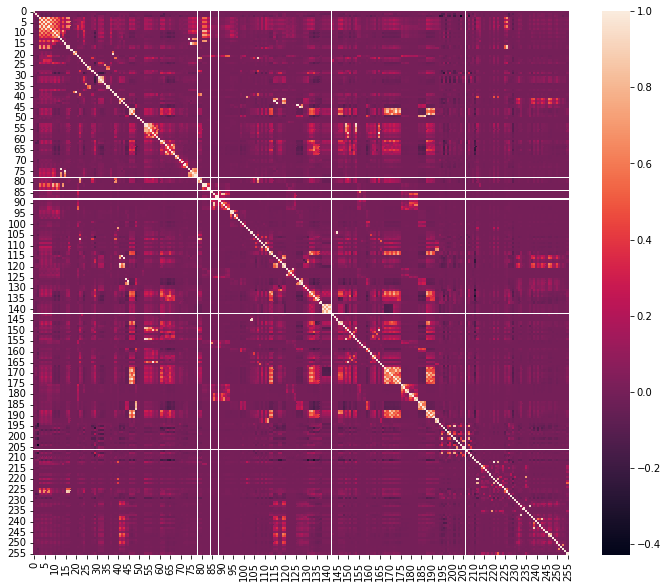

In [ ]:
# plt, ax = plt.subplots(figsize=(12, 10))
# sns.heatmap(dask_df.corr(),ax=ax)

In [ ]:
def truncate_features(df_features, train, test):
    user_ids = np.unique(train['id'].append(test['id']))
    df_features = df_features[df_features['id'].isin(user_ids)]

    cols = df_features.columns
    corr_threshold = 0.5
    corr = df_features[cols].corr().abs().values
    corr = corr.compute_chunk_sizes()
    corr = da.triu(corr)
    out = (corr != 1) & (corr > corr_threshold)
    out = out.compute()
    cols_to_remove = []
    for o in out:
      cols_to_remove += cols[o].to_list()
    cols_to_remove = list(set(cols_to_remove))
    if 'id' in cols_to_remove:
      cols_to_remove = cols_to_remove.drop(['id'], axis=1)
    df_features = df_features.drop(cols_to_remove, axis=1)

    if 'Unnamed: 0' in df_features:
        df_features = df_features.drop(columns='Unnamed: 0')
    df_features = df_features.compute()

    df_nunique = df_features.apply(lambda x: x.nunique(dropna=False))
    const = df_nunique[df_nunique == 1].index.tolist()
    df_features = df_features.drop(columns = const)
    return df_features

In [ ]:
features = truncate_features(dask_df, train, test)

In [ ]:
features.head()

,43,47,97,127,149
13,276.621311,-6.994502,-0.348913,-0.060451,-0.007024
16,-0.028689,-7.909355,-0.348913,-0.060451,-0.007024
19,-119.662019,-7.997875,-0.348913,-0.040451,-0.007024
20,-117.462020,-7.152420,-0.348913,-0.060451,-0.007024
22,51.871321,-7.874517,-0.348913,-0.060451,-0.007024


In [ ]:
features = pd.read_csv('features.csv', sep='\t',
        usecols=['id', '43',	'47',	'97',	'127',	'149'])

In [ ]:
train = pd.merge_asof(train.sort_values(by=['id']),
                      features.sort_values(by=['id']), 
                      on='id',
                      direction='nearest')

In [ ]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2,
                                          random_state=42)

In [ ]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

task = Task('binary', metric = f1_metric)

In [ ]:
automl = TabularAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]})

In [ ]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})
valid_pred = automl.predict(valid_data)

In [35]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9273194032363277
VALID acc: 0.9276623118961589
f1_score acc: 0.4812709144833479


In [36]:
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'cb'], ['lgb_tuned', 'cb']]})

In [37]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})
valid_pred = automl.predict(valid_data)

In [38]:
print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9274020699751399
VALID acc: 0.9277705298471121
f1_score acc: 0.4812709144833479


In [40]:
train = pd.merge_asof(train.sort_values(by=['id']), 
                      features.sort_values(by=['id']), 
                      on='id', 
                      direction='backward')

In [41]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2, 
                                          random_state=42)

In [42]:
automl = TabularAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]})

In [43]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})
valid_pred = automl.predict(valid_data)

In [44]:
print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9272803244143437
VALID acc: 0.9274759365361839
f1_score acc: 0.481212669400995


In [45]:
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'cb'], ['lgb_tuned', 'cb']]})

In [46]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})
valid_pred = automl.predict(valid_data)

In [47]:
print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9274712094294192
VALID acc: 0.9272354522007322
f1_score acc: 0.481212669400995


In [48]:
train = pd.merge_asof(train.sort_values(by=['id']), 
                      features.sort_values(by=['id']),
                      on='id', 
                      direction='forward')

In [49]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2,
                                          random_state=42)

In [50]:
automl = TabularAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]})

In [51]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})

In [52]:
valid_pred = automl.predict(valid_data)

In [53]:
print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9271570758219329
VALID acc: 0.9275540939452056
f1_score acc: 0.48126929674099483


In [54]:
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600,
                       cpu_limit = os_cpu,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'cb'], ['lgb_tuned', 'cb']]})

In [55]:
train_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})
valid_pred = automl.predict(valid_data)

In [58]:
print('TRAIN acc: {}'.format(acc_score(train_data['target'].values, train_pred.data[:, 0])))
print('VALID acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))
print('f1_score acc: {}'.format(f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')))

TRAIN acc: 0.9273825305641479
VALID acc: 0.9277344571967944
f1_score acc: 0.48126929674099483


In [59]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target', 'buy_time'], axis=1),
                                                    train['target'], test_size=0.2, shuffle=True,random_state=42)

params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

In [60]:
model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train.astype(int))

XGBClassifier(eval_metric='auc', seed=42, use_label_encoder=False)

In [61]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_score = f1_score(y_train, train_pred, average='macro')
test_score = f1_score(y_test, test_pred, average='macro')

print(f"Train-score: {round(train_score, 4)}, Test-score: {round(test_score, 4)}")

Train-score: 0.4817, Test-score: 0.4814


In [62]:
def make_cross_validation(X: pd.DataFrame,
                          y: pd.Series,
                          estimator: object,
                          metric: callable,
                          cv_strategy):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    estimator: callable
        Объект модели для обучения.

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])

    for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
        x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

        estimator.fit(x_train, y_train)
        y_train_pred = estimator.predict(x_train)
        y_valid_pred = estimator.predict(x_valid)

        fold_train_scores.append(metric(y_train, y_train_pred))
        fold_valid_scores.append(metric(y_valid, y_valid_pred))
        oof_predictions[valid_idx] = y_valid_pred

        msg = (
            f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
            f"valid-observations = {len(valid_idx)}\n"
            f"train-score = {round(fold_train_scores[fold_number], 4)}, "
            f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
        )
        print(msg)
        print("="*69)
        estimators.append(estimator)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [63]:
def f1_score_macro(true, pred):
    return f1_score(true, pred.astype(int), average='macro')

cv_strategy = KFold(n_splits=10)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro, 
    cv_strategy=cv_strategy
)

Fold: 1, train-observations = 748487, valid-observations = 83166
train-score = 0.4827, valid-score = 0.5716
Fold: 2, train-observations = 748487, valid-observations = 83166
train-score = 0.4819, valid-score = 0.4756
Fold: 3, train-observations = 748487, valid-observations = 83166
train-score = 0.4824, valid-score = 0.4777
Fold: 4, train-observations = 748488, valid-observations = 83165
train-score = 0.4821, valid-score = 0.4786
Fold: 5, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4805
Fold: 6, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4819
Fold: 7, train-observations = 748488, valid-observations = 83165
train-score = 0.4815, valid-score = 0.4834
Fold: 8, train-observations = 748488, valid-observations = 83165
train-score = 0.4814, valid-score = 0.4849
Fold: 9, train-observations = 748488, valid-observations = 83165
train-score = 0.4811, valid-score = 0.4867
Fold: 10, train-observations

In [65]:
def f1_score_macro_threshold(true, pred):
    return f1_score(true, np.where(pred > 0.3, 1, 0), average='macro')

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro_threshold, 
    cv_strategy=cv_strategy
)

Fold: 1, train-observations = 748487, valid-observations = 83166
train-score = 0.4827, valid-score = 0.5716
Fold: 2, train-observations = 748487, valid-observations = 83166
train-score = 0.4819, valid-score = 0.4756
Fold: 3, train-observations = 748487, valid-observations = 83166
train-score = 0.4824, valid-score = 0.4777
Fold: 4, train-observations = 748488, valid-observations = 83165
train-score = 0.4821, valid-score = 0.4786
Fold: 5, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4805
Fold: 6, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4819
Fold: 7, train-observations = 748488, valid-observations = 83165
train-score = 0.4815, valid-score = 0.4834
Fold: 8, train-observations = 748488, valid-observations = 83165
train-score = 0.4814, valid-score = 0.4849
Fold: 9, train-observations = 748488, valid-observations = 83165
train-score = 0.4811, valid-score = 0.4867
Fold: 10, train-observations

In [66]:
params = {
        "objective": "binary:logistic",
        "booster" : "dart",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro, 
    cv_strategy=cv_strategy
)

Fold: 1, train-observations = 748487, valid-observations = 83166
train-score = 0.4827, valid-score = 0.5716
Fold: 2, train-observations = 748487, valid-observations = 83166
train-score = 0.4819, valid-score = 0.4756
Fold: 3, train-observations = 748487, valid-observations = 83166
train-score = 0.4824, valid-score = 0.4777
Fold: 4, train-observations = 748488, valid-observations = 83165
train-score = 0.4821, valid-score = 0.4786
Fold: 5, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4805
Fold: 6, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4819
Fold: 7, train-observations = 748488, valid-observations = 83165
train-score = 0.4815, valid-score = 0.4834
Fold: 8, train-observations = 748488, valid-observations = 83165
train-score = 0.4814, valid-score = 0.4849
Fold: 9, train-observations = 748488, valid-observations = 83165
train-score = 0.4811, valid-score = 0.4867
Fold: 10, train-observations

In [67]:
estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro_threshold, 
    cv_strategy=cv_strategy
)

Fold: 1, train-observations = 748487, valid-observations = 83166
train-score = 0.4827, valid-score = 0.5716
Fold: 2, train-observations = 748487, valid-observations = 83166
train-score = 0.4819, valid-score = 0.4756
Fold: 3, train-observations = 748487, valid-observations = 83166
train-score = 0.4824, valid-score = 0.4777
Fold: 4, train-observations = 748488, valid-observations = 83165
train-score = 0.4821, valid-score = 0.4786
Fold: 5, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4805
Fold: 6, train-observations = 748488, valid-observations = 83165
train-score = 0.4819, valid-score = 0.4819
Fold: 7, train-observations = 748488, valid-observations = 83165
train-score = 0.4815, valid-score = 0.4834
Fold: 8, train-observations = 748488, valid-observations = 83165
train-score = 0.4814, valid-score = 0.4849
Fold: 9, train-observations = 748488, valid-observations = 83165
train-score = 0.4811, valid-score = 0.4867
Fold: 10, train-observations

In [68]:
url = 'https://drive.google.com/file/d/1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
train = pd.read_csv(dwn_url)

train.drop(['Unnamed: 0'], axis=1, inplace=True)
train['buy_time'] = train['buy_time'].apply(lambda data: date.fromtimestamp(data))

In [69]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

model.fit(train.drop(['target', 'buy_time'], axis=1),
          train['target']
         )

XGBClassifier(eval_metric='auc', seed=42, use_label_encoder=False)

In [70]:
train_pred = model.predict(train[['id', 'vas_id']])
test_pred = model.predict(test.drop(['buy_time'], axis=1))

In [71]:
def f1_score_macro(true, pred):
    return f1_score(true, pred.astype(int), average='macro')

f1_score_macro(train['target'], train_pred)

0.48161573671789887

In [72]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [73]:
answer_test = test.copy()
answer_test['target'] = test_pred.copy()

In [74]:
answer_test.to_csv('answers_test.csv')